In [179]:
# Important Working Procedure for this script
#  Step 1: Define the path for the training data set
#  Step 2: Define the weights of samples (uniform or distance)
#  Step 3: Define the path for storing gait prediction result of the test set

print("!!Define the Varaibles in the section below!!")

!!Define the Varaibles in the section below!!


In [185]:
# Set up the variables before running the rest of the script!
# Set up Important Variables
databasePath = "/Users/jiayu/Dropbox/Half_Cheetah_Gait_Discovery_Result/10_Percent_Phaselb/1_MiniForces/0_Degrees/database-20191102T155222.csv"

weight_list = ['distance'] #another option uniform/distance

# Define number of neighbors to be considered
#n_neighbors = 10

# For test set
#TestSetSamplePath = "/Users/jiayu/Dropbox/GaitDiscoveryResult_withWrongVeloConstraint/Half_Cheetah_Gait_Discovery_Results/Boxy_Force_Limit/10_Percent_Phaselb/1_MiniForce/0_Degrees_Processed/TestSet/TestSet_TaskSamples-20191029T192221.csv"

#PredictionResultPath = "/Users/jiayu/Dropbox/GaitDiscoveryResult_withWrongVeloConstraint/Half_Cheetah_Gait_Discovery_Results/Boxy_Force_Limit/10_Percent_Phaselb/1_MiniForce/0_Degrees_Processed/TestSet/Prediction_Result.csv"

In [186]:
# Load Data
# Gait Mapping Generation using K-Nearest Neighbor
# with Plot function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

# Load data
import pandas as pd
dataset = pd.read_csv(databasePath) 

Automatically created module for IPython interactive environment


Galloping     55
Infeasible    30
Walking-S     17
Walking-D     10
Bounding-D     6
Pronking       3
Name: Gait, dtype: int64


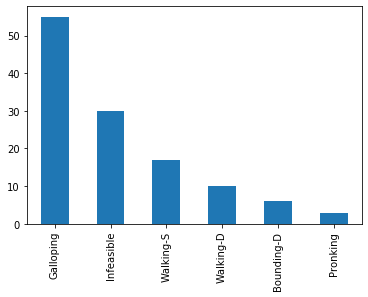

In [187]:
# Statistics of dataset
class_counts = dataset["Gait"].value_counts()
ax = class_counts.plot(kind="bar")
print(class_counts)

In [188]:
y = dataset["GaitNumber"]
X = dataset
del X["Gait"]
del X["GaitNumber"]
#    Convert to Numpy array
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

[0.76, 0.84, 0.84, 0.92, 0.88, 0.84, 0.8, 0.84, 0.76, 0.8, 0.84, 0.76, 0.76, 0.76, 0.72]
[0.76, 0.76, 0.84, 0.88, 0.88, 0.84, 0.8, 0.8, 0.8, 0.88, 0.84, 0.84, 0.76, 0.76, 0.76]


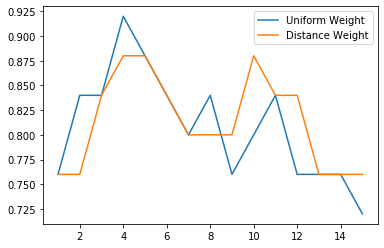

In [197]:
# Decide Hyper Parameter
uniform_accuracy = []
for n_neighbors in range(1,16,1):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X_train, y_train)
    uniform_accuracy.append(clf.score(X_test,y_test)) 

distance_accuracy = []
for n_neighbors in range(1,16,1):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X_train, y_train)
    distance_accuracy.append(clf.score(X_test,y_test)) 
    
print(uniform_accuracy)
print(distance_accuracy)
    

plt.figure()
ax = plt.axes()
ax.plot(range(1,16,1), uniform_accuracy, label = 'Uniform Weight');
ax.plot(range(1,16,1), distance_accuracy, label = 'Distance Weight');
ax.legend()

weight_best = ['uniform']
n_neighbors = 4

0.92


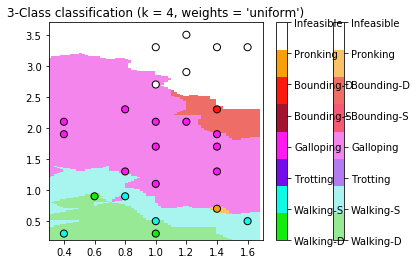

[0.4 0.3]
[[0.5 0.5 0.  0.  0.  0. ]]
[0.6 0.9]
[[0.5 0.5 0.  0.  0.  0. ]]
[1.  2.7]
[[0.  0.  0.5 0.  0.  0.5]]
[1.4 2.3]
[[0.  0.  0.  0.5 0.  0.5]]
[0.4 1.9]
[[0. 0. 1. 0. 0. 0.]]
[1.4 1.3]
[[0. 0. 1. 0. 0. 0.]]
[0.8 2.3]
[[0. 0. 1. 0. 0. 0.]]
[1.4 1.7]
[[0. 0. 1. 0. 0. 0.]]
[1.2 3.5]
[[0. 0. 0. 0. 0. 1.]]
[1.  0.3]
[[0.75 0.25 0.   0.   0.   0.  ]]
[1.  1.1]
[[0. 0. 1. 0. 0. 0.]]
[0.8 1.3]
[[0.   0.25 0.75 0.   0.   0.  ]]
[1.  2.1]
[[0.   0.   0.75 0.25 0.   0.  ]]
[1.  3.3]
[[0. 0. 0. 0. 0. 1.]]
[1.4 1.9]
[[0.  0.  0.5 0.5 0.  0. ]]
[1.  1.7]
[[0. 0. 1. 0. 0. 0.]]
[1.4 0.7]
[[0.   0.25 0.25 0.   0.5  0.  ]]
[1.2 2.1]
[[0.  0.  0.5 0.5 0.  0. ]]
[1.  0.5]
[[0.25 0.5  0.   0.   0.25 0.  ]]
[1.6 0.5]
[[0.   0.75 0.   0.   0.25 0.  ]]
[0.8 0.9]
[[0.  0.5 0.5 0.  0.  0. ]]
[1.6 3.3]
[[0. 0. 0. 0. 0. 1.]]
[1.4 3.3]
[[0. 0. 0. 0. 0. 1.]]
[0.4 2.1]
[[0. 0. 1. 0. 0. 0.]]
[1.2 2.9]
[[0. 0. 0. 0. 0. 1.]]


In [200]:
h = .02  # step size in the mesh

# Define color maps
#                           Walking-D  Walking-S  Trotting  Galloping Bounding-S Bounding-D Pronking  
cmap_light = ['#97e995', '#a8f5ef', '#b27cee','#f485ed','#f65876','#ef6d67','#fac266','#FFFFFF']
cmap_bold = ['#14eb0f', '#10f9e7', '#750ce9','#ff1af0','#A2142F','#fa1a0f','#f89f0d','#FFFFFF']

GaitNames = [ 'Walking-D', 'Walking-S','Trotting', 'Galloping', 'Bounding-S', 'Bounding-D', 'Pronking', 'Infeasible']

for weights in weight_best:
#for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)
    
    print(clf.score(X_test, y_test))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Get unique labels, !BE CAREFUL of INDEXING!
    result_unique_labels = np.unique(Z) #unique labels for classification result
    color_mesh_temp = cmap_light[np.min(result_unique_labels)-1:np.max(result_unique_labels)] #build color map for classification result
    sample_unique_labels = np.unique(y) #unique labels for training data
    color_sample_temp = cmap_bold[np.min(sample_unique_labels)-1:np.max(sample_unique_labels)] #
    color_mesh_temp = ListedColormap(color_mesh_temp)
    color_sample_temp = ListedColormap(color_sample_temp)
    
    # Build gait name list, !BE CAREFUL of INDEXING!
    result_gait_names = GaitNames[np.min(result_unique_labels)-1:np.max(result_unique_labels)] #gait name list for classification results
    sample_gait_names = GaitNames[np.min(sample_unique_labels)-1:np.max(sample_unique_labels)] #gait name list for traininig samples
    
    
    # Plot Figures
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=color_mesh_temp)
    cb = plt.colorbar()
    loc = np.arange(0,np.max(result_unique_labels)) + 1
    cb.set_ticks(loc)
    cb.set_ticklabels(result_gait_names)
    plt.xlim([0.3, 1.7])
    plt.ylim([0.2, 3.7])
    
    
    # Plot also the training points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=color_sample_temp,
                edgecolor='k', s=50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    cb = plt.colorbar()
    loc = np.arange(0,np.max(sample_unique_labels)) + 1
    cb.set_ticks(loc)
    cb.set_ticklabels(sample_gait_names)
    plt.xlim([0.3, 1.7])
    plt.ylim([0.2, 3.7])
plt.show()

for test_sample in X_test:
    print(test_sample)
    print(clf.predict_proba([test_sample]))

In [14]:
# Predict

#  Load Test Set Task Samples and predict
testSamples = pd.read_csv(TestSetSamplePath) 
testSamples = testSamples.to_numpy()
testSampleGaitNumber = clf.predict(testSamples)
testSampleGaitNumber_test = clf.predict_proba(testSamples)
testSampleGaitLabels = []
for gaitNumberTemp in testSampleGaitNumber:
    testSampleGaitLabels.append(GaitNames[gaitNumberTemp-1])


NameError: name 'TestSetSamplePath' is not defined

In [13]:
prediction_result = []
for i in range(0,len(testSampleGaitNumber)):
    prediction_result.append({"StridePeriod": testSamples[i,0], "Speed": testSamples[i,1], "GaitNumber": testSampleGaitNumber[i], "Gait": testSampleGaitLabels[i]})

import csv
with open(PredictionResultPath, 'w') as csvFile:
    fields = ['StridePeriod', 'Speed', 'GaitNumber', 'Gait']
    writer = csv.DictWriter(csvFile, fieldnames=fields)
    writer.writeheader()
    writer.writerows(prediction_result)